In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

backend = provider.get_backend('qasm_simulator')

q = QuantumRegister(12, 'q')
c = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(q,c)

### Addressing ###

#q[0],q[1] -> Memory cell
#  0    0  -> 00
#  0    1  -> 01
#  1    0  -> 10
#  1    1  -> 11

#circuit.x(q[0])
#circuit.x(q[1])

### Routing nodes ####
circuit.cx(q[0],q[2])
circuit.x(q[3])
circuit.cx(q[2],q[3])

circuit.ccx(q[1],q[2],q[4])
circuit.cx(q[4],q[2])

circuit.ccx(q[1],q[3],q[5])
circuit.cx(q[5],q[3])

circuit.x(q[11]) #Write mode (read mode if commented)

### Writing to memory cell ###
circuit.ccx(q[11],q[4],q[9])
circuit.ccx(q[11],q[5],q[8])
circuit.ccx(q[11],q[2],q[7])
circuit.ccx(q[11],q[3],q[6])

circuit.barrier(q)

### Reading memory cell ###
circuit.ccx(q[4],q[9],q[10])
circuit.ccx(q[5],q[8],q[10])
circuit.ccx(q[2],q[7],q[10])
circuit.ccx(q[3],q[6],q[10])

circuit.barrier(q)
circuit.measure(q[10],c[0]) # Measuring readout qubit 

circuit.draw(output='mpl', filename='QRAM.png')

job = execute(circuit, backend, shots=100)
job_monitor(job)

counts = job.result().get_counts()

print(circuit)
print(counts)

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('qasm_simulator')

In [24]:
qc = QuantumCircuit(5)
qc.h([0,1,2,3,4])
qc.measure_all()
qc.draw()

┌───┐ ░ ┌─┐            
   q_0: ┤ H ├─░─┤M├────────────
        ├───┤ ░ └╥┘┌─┐         
   q_1: ┤ H ├─░──╫─┤M├─────────
        ├───┤ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├─░──╫──╫─┤M├──────
        ├───┤ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════╩══╩══╩══╩══╩═
                 0  1  2  3  4

In [26]:
result = execute(qc,backend).result()

In [28]:
count = result.get_counts()
hist = plot_histogram(count)

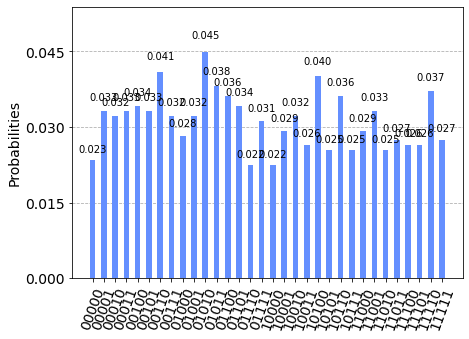

In [29]:
hist

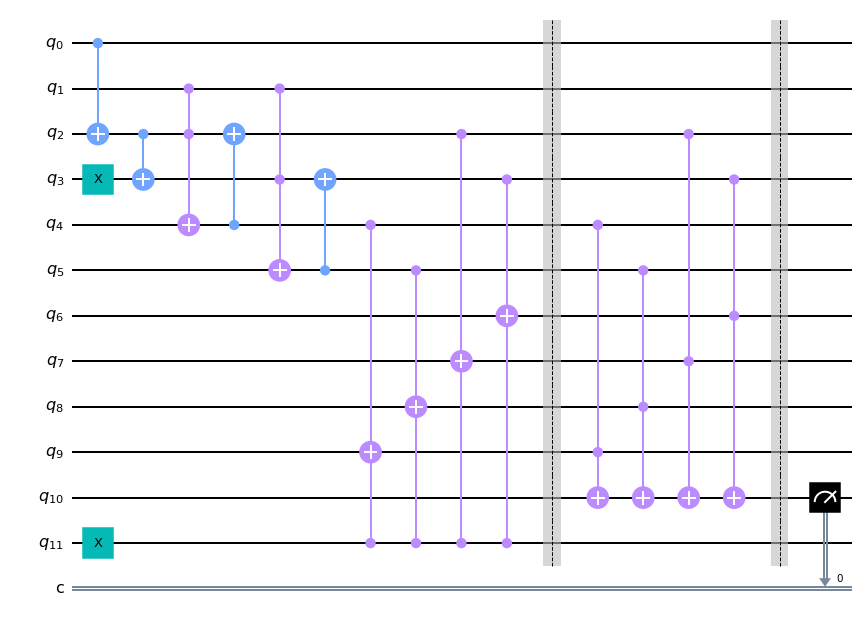

In [4]:
q0 = QuantumRegister(5, 'q_addr')
q1 = QuantumRegister(5, 'q_routing')
q2 = QuantumRegister(4, 'q_value')
c = ClassicalRegister(1, 'c')

circuit = QuantumCircuit(q0,q1,q2,c)

### Addressing ###

#q[0],q[1] -> Memory cell
#  0    0  -> 00
#  0    1  -> 01
#  1    0  -> 10
#  1    1  -> 11

#circuit.x(q[0])
#circuit.x(q[1])

### Routing nodes ####
circuit.cx(q[0],q[2])
circuit.x(q[3])
circuit.cx(q[2],q[3])

circuit.ccx(q[1],q[2],q[4])
circuit.cx(q[4],q[2])

circuit.ccx(q[1],q[3],q[5])
circuit.cx(q[5],q[3])

circuit.x(q[11]) #Write mode (read mode if commented)

### Writing to memory cell ###
circuit.ccx(q[13],q[4],q[9])
circuit.ccx(q[13],q[5],q[8])
circuit.ccx(q[13],q[2],q[7])
circuit.ccx(q[13],q[3],q[6])

circuit.barrier(q)

### Reading memory cell ###
circuit.ccx(q[4],q[9],q[10])
circuit.ccx(q[5],q[8],q[10])
circuit.ccx(q[2],q[7],q[10])
circuit.ccx(q[3],q[6],q[10])

circuit.barrier(q)
circuit.measure(q[10],c[0]) # Measuring readout qubit 

circuit.draw(output='mpl')

In [14]:
from qiskit.circuit.library.arithmetic.adders.draper_qft_adder import DraperQFTAdder

In [16]:
d = DraperQFTAdder(5, 'half')

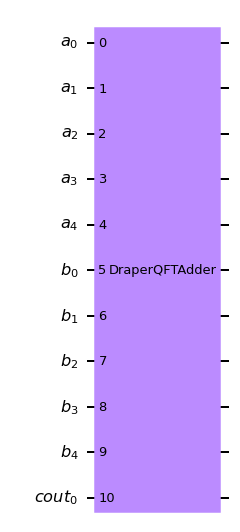

In [18]:
d.draw('mpl')

In [20]:
d = d.decompose()

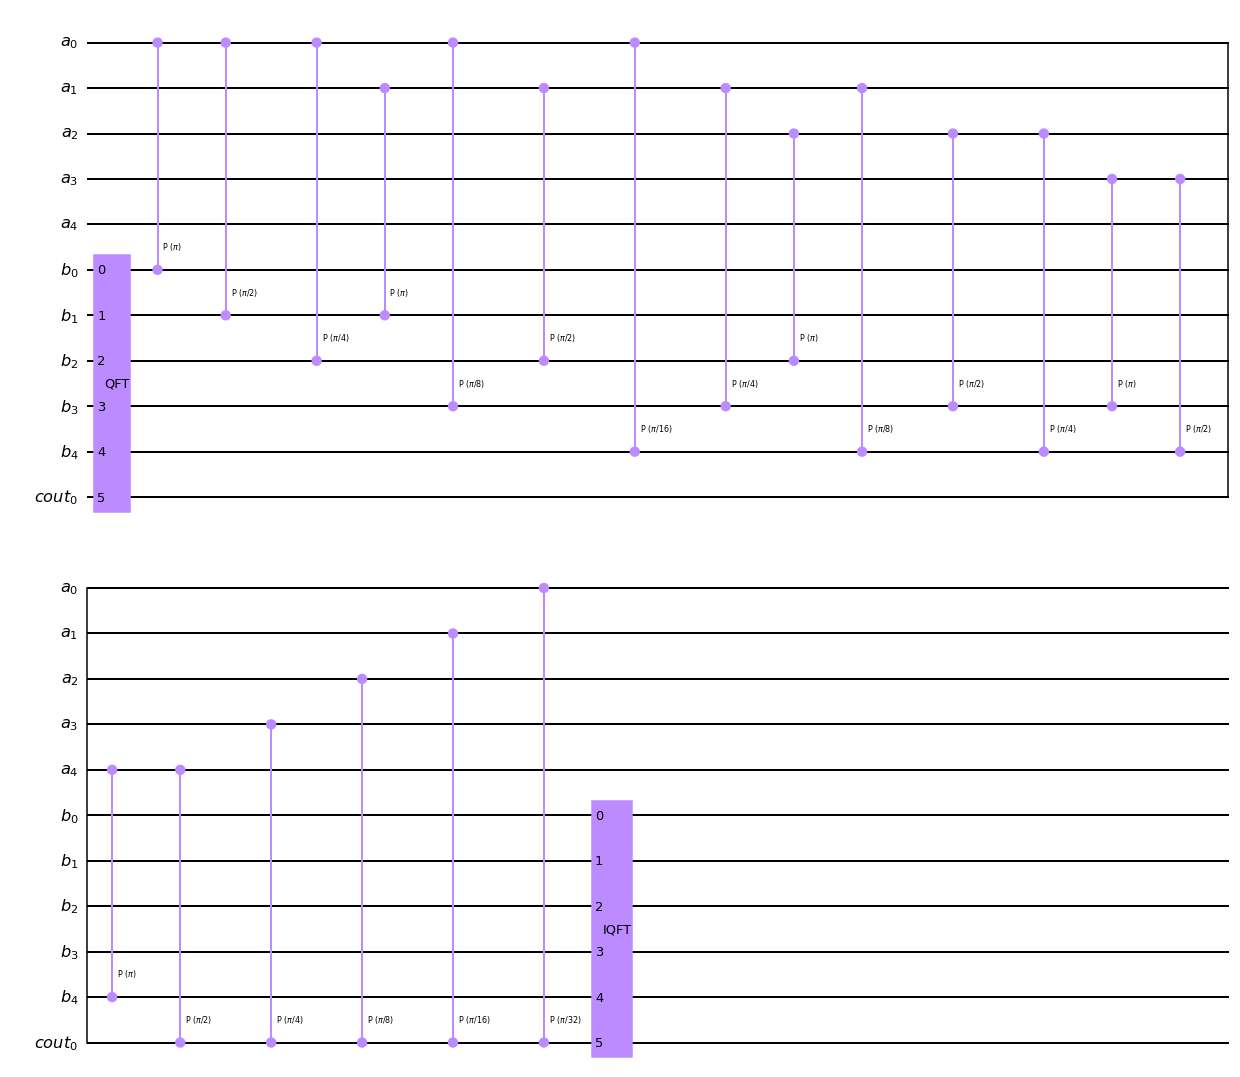

In [21]:
d.draw('mpl')